In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO
# Register converters to avoid warnings
pd.plotting.register_matplotlib_converters()

random_state = 123_456
np.random.seed(random_state)

sns.set()
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=13)

In [11]:
# wpi1 = requests.get('https://www.stata-press.com/data/r12/wpi1.dta').content
# data = pd.read_stata(BytesIO(wpi1))
# data.index = data.t
# Set the frequency
# data.index.freq="QS-OCT"

In [12]:
# data

In [13]:
# data.to_csv('wpi1.csv', index=False)

In [14]:
df = pd.read_csv('wpi1.csv', index_col='t', parse_dates=True)
df.set_index(pd.date_range(min(df.index), periods=df.shape[0], freq='QS-OCT'), inplace=True, verify_integrity=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 1960-01-01 to 1990-10-01
Freq: QS-OCT
Data columns (total 2 columns):
wpi       124 non-null float64
ln_wpi    124 non-null float64
dtypes: float64(2)
memory usage: 2.9 KB


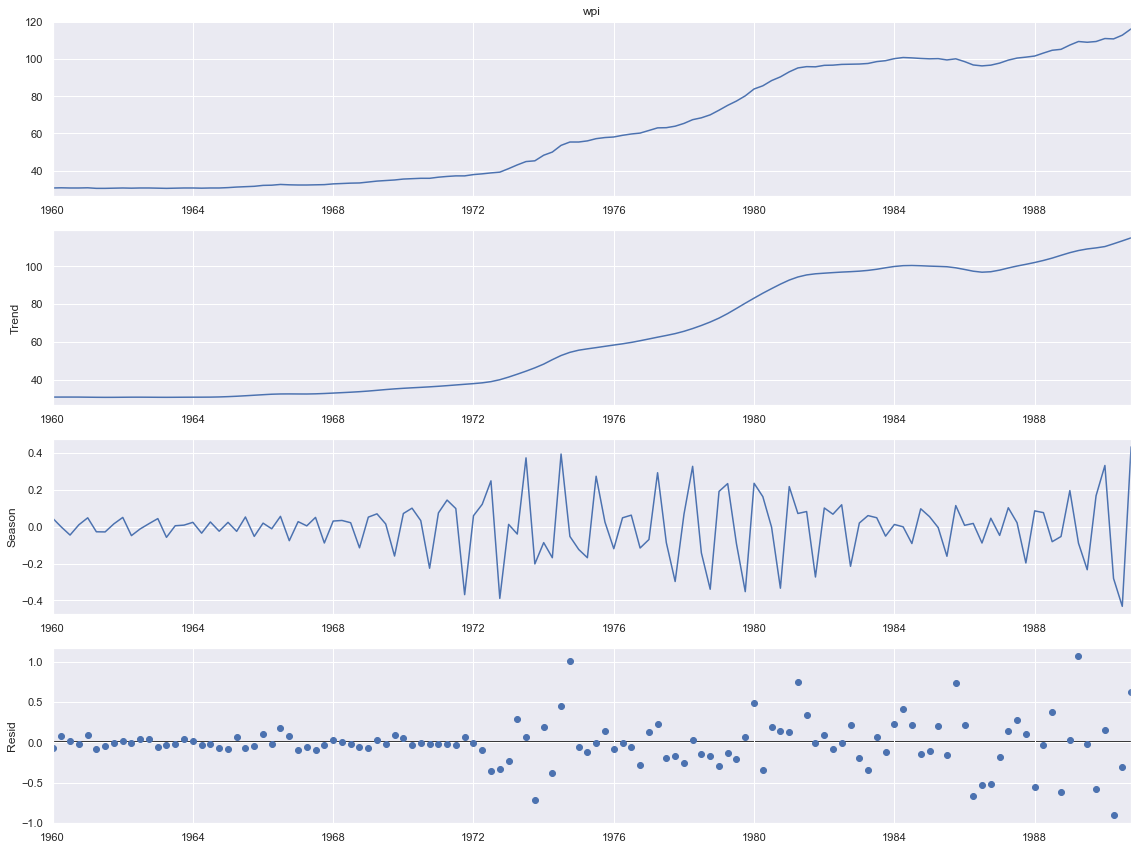

In [17]:
from statsmodels.tsa.seasonal import STL
stl = STL(df.wpi)
res = stl.fit()
fig = res.plot()

In [18]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(df['wpi'], trend='c', order=(1,1,1))
res = mod.fit(disp=False)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    wpi   No. Observations:                  124
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -135.351
Date:                Thu, 05 Mar 2020   AIC                            278.703
Time:                        14:07:48   BIC                            289.951
Sample:                    01-01-1960   HQIC                           283.272
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0943      0.068      1.389      0.165      -0.039       0.227
ar.L1          0.8742      0.055     16.028      0.000       0.767       0.981
ma.L1         -0.4120      0.100     -4.119      0.000      -0.608      -0.216
sigma2         0.5257      0.053      9.849      0.000       0.421       0.630
===================================================================================
Ljung-Box (Q):                       37.12   Jarque-Bera (JB):                 9.78
Prob(Q):                              0.60   Prob(JB):                         0.01
Heteroskedasticity (H):              15.93   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
# one-step-ahead in-sample predictions for the entire sample
y_hat = res.get_prediction()
y_hat.predicted_mean

1960-01-01      0.749786
1960-04-01     31.449806
1960-07-01     31.122190
1960-10-01     30.867850
1961-01-01     30.862599
                 ...    
1989-10-01    109.565332
1990-01-01    109.912118
1990-04-01    112.044810
1990-07-01    111.232375
1990-10-01    113.996825
Freq: QS-OCT, Length: 124, dtype: float64

In [23]:
df

wpi    ln_wpi
1960-01-01   30.7  3.424263
1960-04-01   30.8  3.427515
1960-07-01   30.7  3.424263
1960-10-01   30.7  3.424263
1961-01-01   30.8  3.427515
...           ...       ...
1989-10-01  109.4  4.695011
1990-01-01  111.0  4.709530
1990-04-01  110.8  4.707727
1990-07-01  112.8  4.725617
1990-10-01  116.2  4.755313

[124 rows x 2 columns]